In [2]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.3, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import pandas as pd
data=pd.read_csv('qiime_result/otu/micfunpred_cr_85_contrib/tax_abund_normalized.table',sep='\t',index_col=0)
data.head()

,FMT.ADSC1,FMT.ADSC2,FMT.ADSC3,FMT.ADSC4,FMT.ADSC5,FMT.C571,FMT.C572,FMT.C573,FMT.C574,FMT.C575,...,FMT.NACL1,FMT.NACL2,FMT.NACL3,FMT.NACL4,FMT.NACL5,FMT.SHED1,FMT.SHED2,FMT.SHED3,FMT.SHED4,FMT.SHED5
taxonomy,,,,,,,,,,,,,,,,,,,,,
Actinomyces,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,6.67,0.00,0.00,0.00,0.00,0.00,4.33,0.00,0.00
Adhaeribacter,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Akkermansia,10.67,9.67,34.00,28.00,5.67,894.67,1203.33,130.67,79.00,58.33,...,16.67,172.00,31.67,85.33,19.00,39.00,51.33,25.67,19.67,2.33
Alistipes,298.13,229.44,359.35,291.12,152.80,274.77,225.23,105.14,136.45,185.98,...,172.90,100.47,102.34,93.93,161.21,60.28,69.63,226.17,335.51,61.21
Alloprevotella,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
import anndata
adata1=anndata.AnnData(data.T)
adata1

AnnData object with n_obs × n_vars = 25 × 76

In [16]:
#N,S,A,U,C
#NaCl,SHED,ADSC,HUCMSC,C57
adata1.obs['Group']=[i[:-1] for i in adata1.obs.index]

In [17]:
ov.pp.scale(adata1)
ov.pp.pca(adata1,layer='scaled',n_pcs=20)
adata1

AnnData object with n_obs × n_vars = 25 × 76
    obs: 'Group'
    uns: 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'scaled', 'lognorm'

In [18]:
adata1.obs['sample']=adata1.obs.index.copy()
adata1

AnnData object with n_obs × n_vars = 25 × 76
    obs: 'Group', 'sample'
    uns: 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'scaled', 'lognorm'

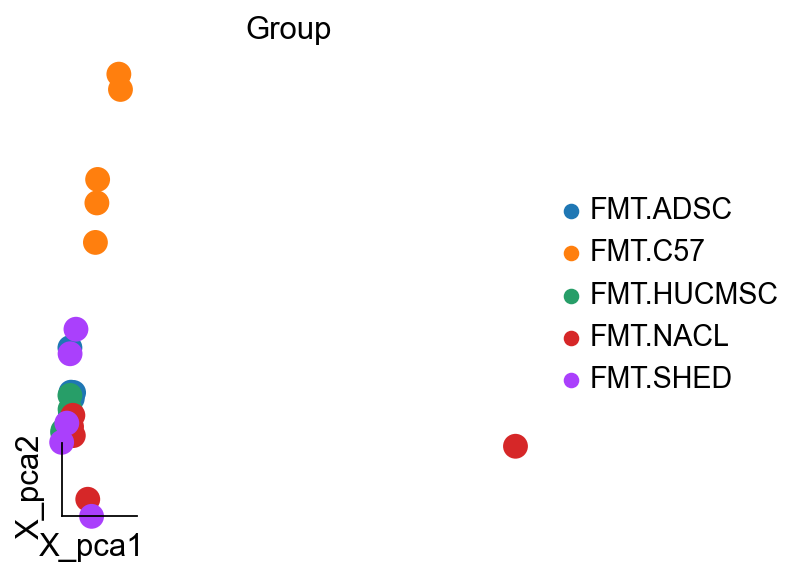

In [19]:
adata1.obsm['X_pca']=adata1.obsm['scaled|original|X_pca']
#sc.tl.pca(adata,n_comps = 10)
ov.utils.embedding(adata1,
                  basis='X_pca',
                  color='Group',
                  frameon='small',
                  size=500)

computing PCA
    with n_comps=20
    finished (0:00:00)
    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_sample']`


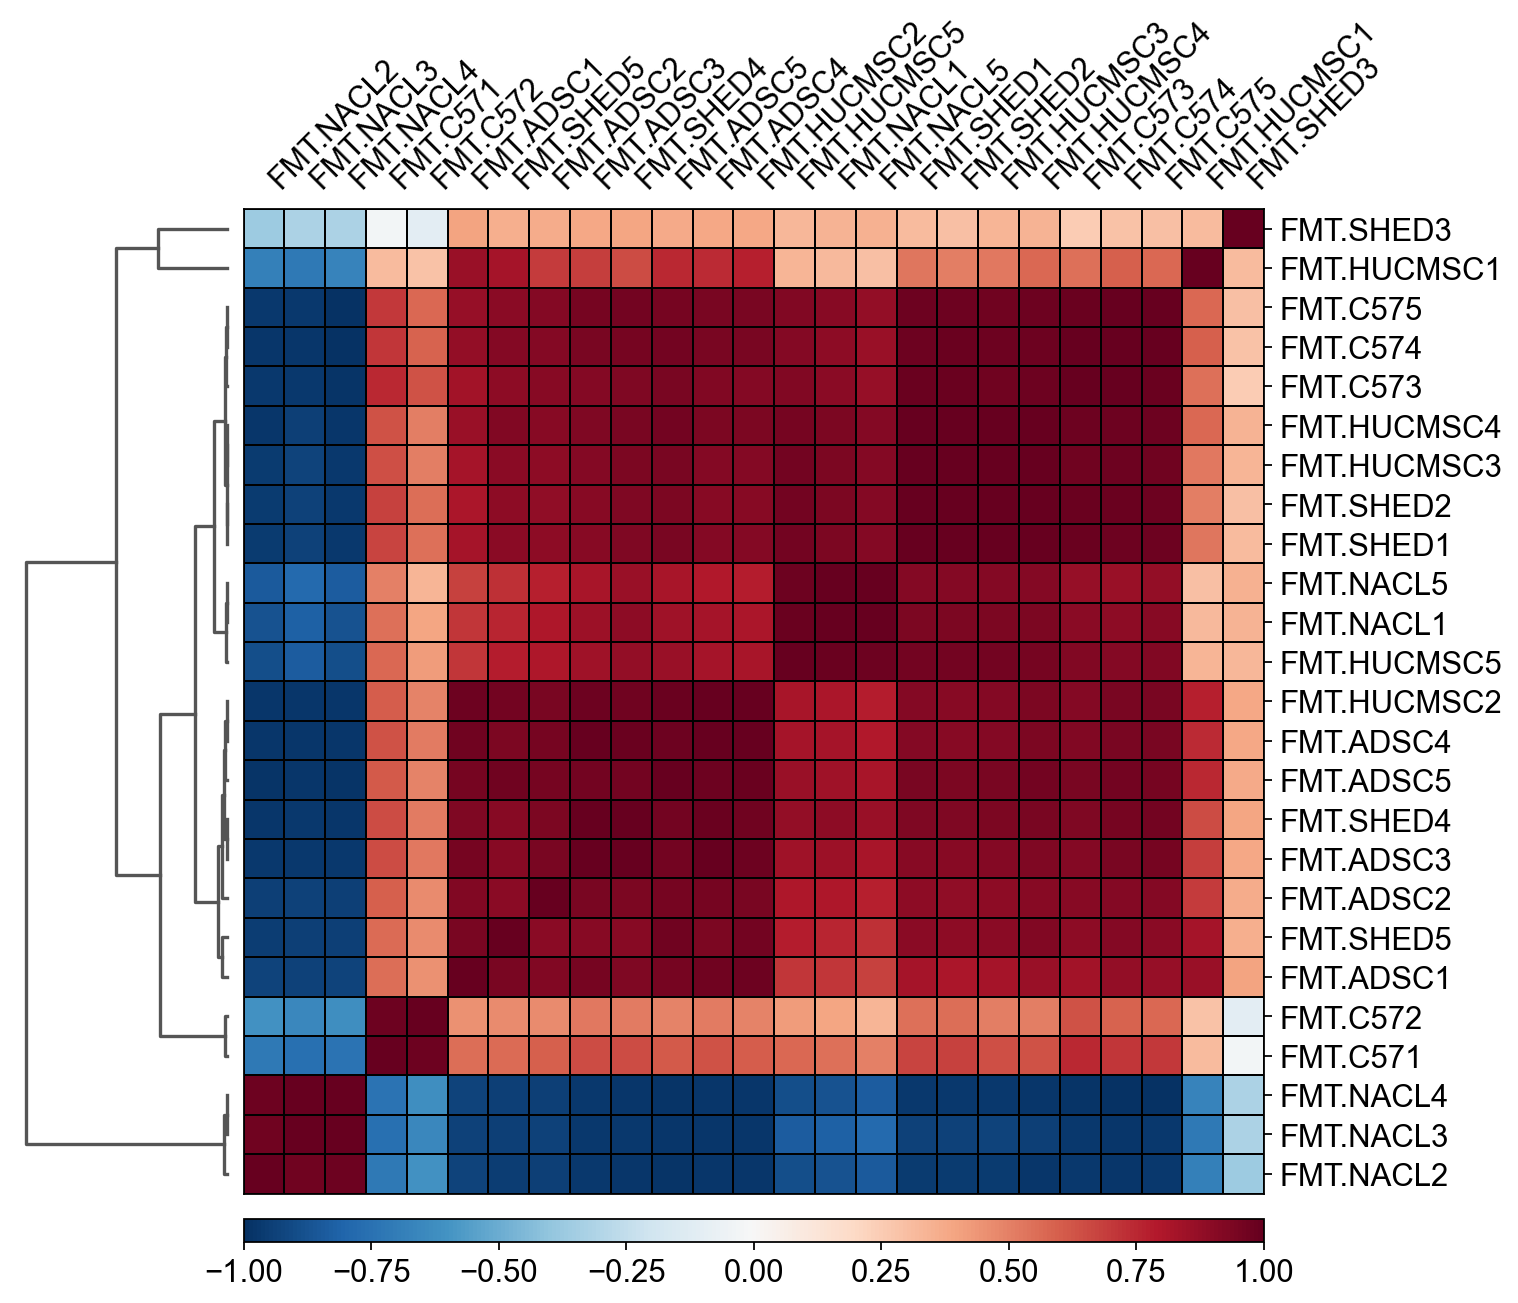

In [20]:
adata1.obs['sample']=adata1.obs['sample'].astype('category')
sc.tl.pca(adata1,n_comps = 20)
sc.tl.dendrogram(adata1,'sample',use_raw=True,)
sc.pl.correlation_matrix(adata1, 'sample',
                         figsize=(10,8.5),
                        cmap='RdBu_r')

computing PCA
    with n_comps=20
    finished (0:00:00)
    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_Group']`


[Text(1, 0.5, 'FMT.NACL'),
 Text(1, 1.5, 'FMT.C57'),
 Text(1, 2.5, 'FMT.SHED'),
 Text(1, 3.5, 'FMT.ADSC'),
 Text(1, 4.5, 'FMT.HUCMSC')]

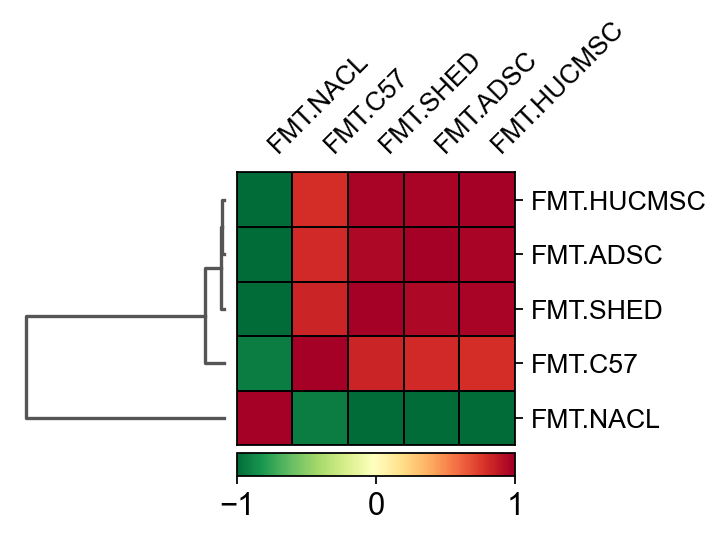

In [21]:
sc.tl.pca(adata1,n_comps = 20)
sc.tl.dendrogram(adata1,'Group',use_raw=True,)
axes=sc.pl.correlation_matrix(adata1, 'Group',
                         figsize=(4,2.5),
                        cmap='RdYlGn_r',show=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=12)
axes[1].set_yticklabels(axes[1].get_yticklabels(),fontsize=12)
#plt.savefig('figures/heatmap_group.png',dpi=300,bbox_inches='tight')
#plt.savefig('pdf/heatmap_group.pdf',dpi=300,bbox_inches='tight')


In [22]:
plt_data=pd.DataFrame(columns=['taxonomy','value','sample'])
tax_name=adata1.to_df().sum().sort_values(ascending=False)[:20].index
adata1=anndata.AnnData(data.T)
#sc.pp.log1p(adata1)
adata1.obs['sample']=adata1.obs.index.copy()
#adata1=adata1[~adata1.obs['sample'].isin(['FMT.NACL2','FMT.SHED5'])]


for i in adata1.obs['sample']:
    plt_data1=pd.DataFrame()
    test1=adata1[adata1.obs['sample']==i].to_df()
    test=adata1[adata1.obs['sample']==i].to_df()
    test=test.T.loc[~test.T.index.isin(tax_name)]
    test1=test1.T.loc[tax_name].T
    test1['Others']=test.sum()
    
    
    plt_data1['taxonomy']=test1.T.index.tolist()
    plt_data1['value']=(test1.T/test1.T.sum())[i].values
    plt_data1['sample']=i
    plt_data=pd.concat([plt_data,plt_data1])
plt_data

,taxonomy,value,sample
0,Sphingomonas,0.060384,FMT.ADSC1
1,Helicobacter,0.314307,FMT.ADSC1
2,Alistipes,0.190139,FMT.ADSC1
3,Akkermansia,0.006805,FMT.ADSC1
4,Blautia,0.016869,FMT.ADSC1
...,...,...,...
16,Subdoligranulum,0.000000,FMT.SHED5
17,Methylobacterium,0.000000,FMT.SHED5
18,Parabacteroides,0.004232,FMT.SHED5
19,Fusicatenibacter,0.000000,FMT.SHED5


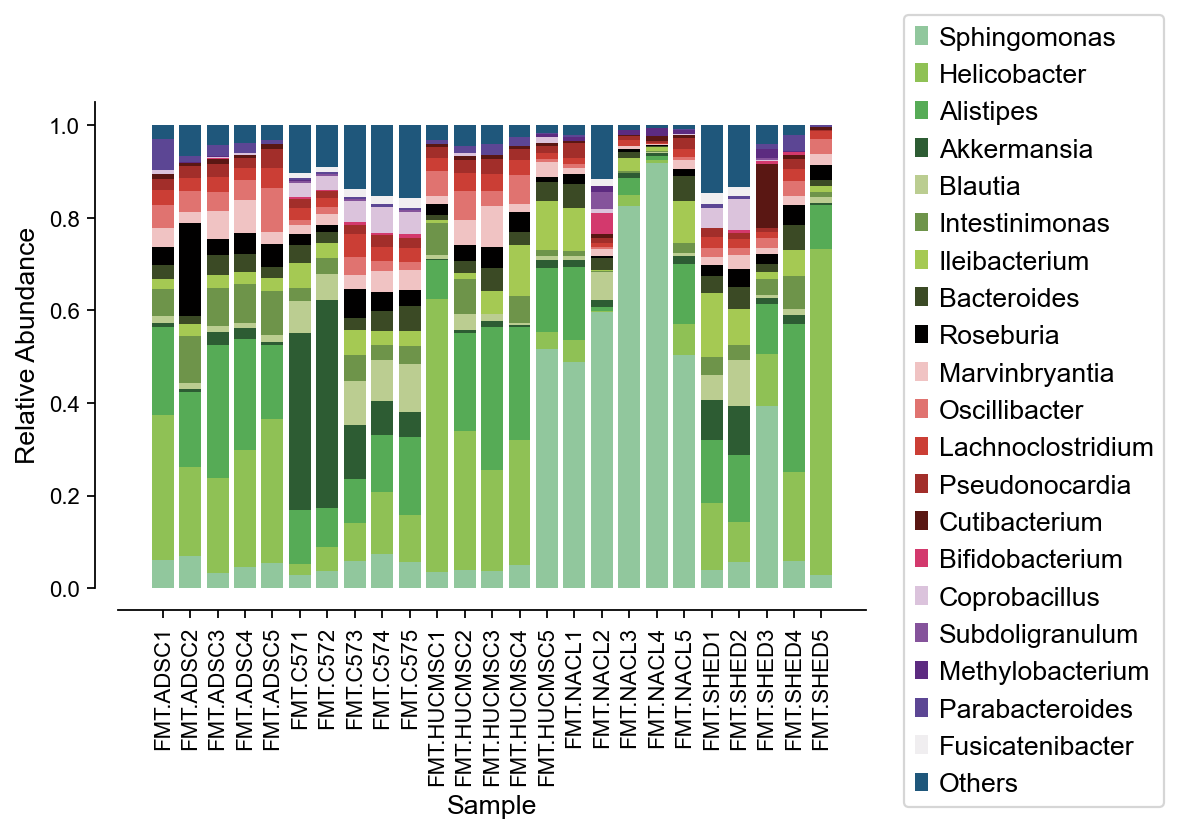

In [23]:
import matplotlib.pyplot as plt
pp=plt.figure(figsize=(6,4))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="ticks")
n=0
all_celltype=tax_name.tolist()
all_celltype.append('Others')
palette=ov.utils.green_color+ov.utils.red_color+ov.utils.sc_color[10:]
for i in all_celltype:
    if n==0:
        test1=plt_data[plt_data['taxonomy']==i]
        ax.bar(x=test1['sample'],height=test1['value'],width=0.8, 
               color=palette[n],label=i)
        bottoms=test1['value'].values
    else:
        test2=plt_data[plt_data['taxonomy']==i]
        ax.bar(x=test2['sample'],height=test2['value'],bottom=bottoms,width=0.8,
               color=palette[n],label=i)
        test1=test2
        bottoms+=test1['value'].values
    n+=1
# 设置左边和下边的坐标轴线为独立的线段
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))


plt.legend(bbox_to_anchor=(1.05, -0.45), loc=3, borderaxespad=0,fontsize=12)
plt.xlabel('Sample',fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.ylabel('Relative Abundance',fontsize=12)
plt.grid(False)

#plt.savefig('figures/Prop_sample_20.png',dpi=300,bbox_inches='tight')
#plt.savefig('pdf/Prop_sample_20.pdf',dpi=300,bbox_inches='tight')


In [24]:
all_celltype_dict=dict(zip(all_celltype,
                      ov.utils.green_color+ov.utils.red_color+ov.utils.sc_color[10:]))

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import omicverse as ov
import scanpy as sc

ov.utils.ov_plot_set()

In [26]:
file_path='qiime_result/otu/micfunpred_cr_85_contrib/KO_metagenome/KO_metagenome_MinPath_prunned_with_description.tsv.gz'
ko_pred=pd.read_csv(file_path,index_col=0,sep='\t').fillna(0)
ko_pred.head()

,FMT.ADSC1,FMT.ADSC2,FMT.ADSC3,FMT.ADSC4,FMT.ADSC5,FMT.C571,FMT.C572,FMT.C573,FMT.C574,FMT.C575,...,FMT.SHED1,FMT.SHED2,FMT.SHED3,FMT.SHED4,FMT.SHED5,A,B,C,EC,Pathway_Module
K00001,327.784836,276.695172,394.994672,344.848737,208.729514,1565.157868,1832.680367,404.341115,352.295786,352.116155,...,180.217673,196.669026,252.681871,318.842291,58.053274,A09100 Metabolism,B 09101 Carbohydrate metabolism,C 00010 Glycolysis / Gluconeogenesis [PATH:ko0...,"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]",0
K00001,327.784836,276.695172,394.994672,344.848737,208.729514,1565.157868,1832.680367,404.341115,352.295786,352.116155,...,180.217673,196.669026,252.681871,318.842291,58.053274,A09100 Metabolism,B 09103 Lipid metabolism,C 00071 Fatty acid degradation [PATH:ko00071],"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]",0
K00001,327.784836,276.695172,394.994672,344.848737,208.729514,1565.157868,1832.680367,404.341115,352.295786,352.116155,...,180.217673,196.669026,252.681871,318.842291,58.053274,A09100 Metabolism,B 09105 Amino acid metabolism,C 00350 Tyrosine metabolism [PATH:ko00350],"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]",0
K00001,327.784836,276.695172,394.994672,344.848737,208.729514,1565.157868,1832.680367,404.341115,352.295786,352.116155,...,180.217673,196.669026,252.681871,318.842291,58.053274,A09100 Metabolism,B 09108 Metabolism of cofactors and vitamins,C 00830 Retinol metabolism [PATH:ko00830],"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]",0
K00001,327.784836,276.695172,394.994672,344.848737,208.729514,1565.157868,1832.680367,404.341115,352.295786,352.116155,...,180.217673,196.669026,252.681871,318.842291,58.053274,A09100 Metabolism,B 09111 Xenobiotics biodegradation and metabol...,C 00625 Chloroalkane and chloroalkene degradat...,"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]",0


In [27]:
ko_pred.loc[ko_pred['C'].astype('str').str.contains('bile')]

,FMT.ADSC1,FMT.ADSC2,FMT.ADSC3,FMT.ADSC4,FMT.ADSC5,FMT.C571,FMT.C572,FMT.C573,FMT.C574,FMT.C575,...,FMT.SHED1,FMT.SHED2,FMT.SHED3,FMT.SHED4,FMT.SHED5,A,B,C,EC,Pathway_Module
K01442,1117.463546,1137.86697,1055.290487,921.677034,526.042363,1376.520392,1203.0304,772.549393,754.279223,885.017238,...,315.12269,377.328943,734.154701,963.30294,204.54785,A09100 Metabolism,B 09103 Lipid metabolism,C 00120 Primary bile acid biosynthesis [PATH:k...,E3.5.1.24; choloylglycine hydrolase [EC:3.5.1.24],0
K01442,1117.463546,1137.86697,1055.290487,921.677034,526.042363,1376.520392,1203.0304,772.549393,754.279223,885.017238,...,315.12269,377.328943,734.154701,963.30294,204.54785,A09100 Metabolism,B 09103 Lipid metabolism,C 00121 Secondary bile acid biosynthesis [PATH...,E3.5.1.24; choloylglycine hydrolase [EC:3.5.1.24],0


In [28]:
import anndata
adata=anndata.AnnData(ko_pred.T.iloc[:25])
adata

AnnData object with n_obs × n_vars = 25 × 4687

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
#N,S,A,U,C
#NaCl,SHED,ADSC,HUCMSC,C57
adata.obs['Group']=[i[:-1] for i in adata.obs.index]
adata.obs['sample']=adata.obs.index.copy()
adata.var_names_make_unique()
adata.obs['sample']=adata.obs['sample'].astype('category')
ov.pp.scale(adata)
ov.pp.pca(adata,layer='scaled',n_pcs=20)


normalizing counts per cell
    finished (0:00:00)


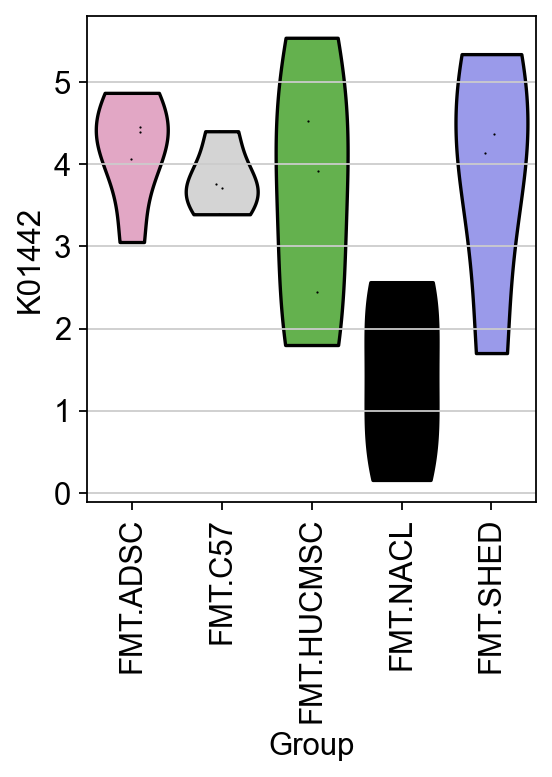

In [30]:

sc.pl.violin(adata[~adata.obs['sample'].isin(['FMT.C572','FMT.SHED5'])],
             'K01442',groupby='Group',show=False,
             palette=['#EC9DC5','#D4D4D4','#5BC23D','#000000','#8D8DF7'])
plt.xticks(rotation=90)
plt.show()

In [31]:
plot_data=pd.DataFrame()
for group in ['FMT.NACL','FMT.C57','FMT.SHED','FMT.ADSC','FMT.HUCMSC']:
    plot_data[group]=adata[adata.obs['Group']==group,'K01442'].to_df().values.reshape(-1)
plot_data

,FMT.NACL,FMT.C57,FMT.SHED,FMT.ADSC,FMT.HUCMSC
0,2.565131,3.392509,4.135073,4.064220,1.799104
1,1.382165,2.639128,4.369442,4.455606,3.921000
2,0.610235,3.766848,1.701026,4.871535,5.542830
3,0.155039,3.708680,5.343474,4.394522,4.522928
4,2.321576,4.404052,2.071955,3.053839,2.449808


Text(0.5, 1.0, 'Bile acid biosynthesis \n[PATH:ko00120]')

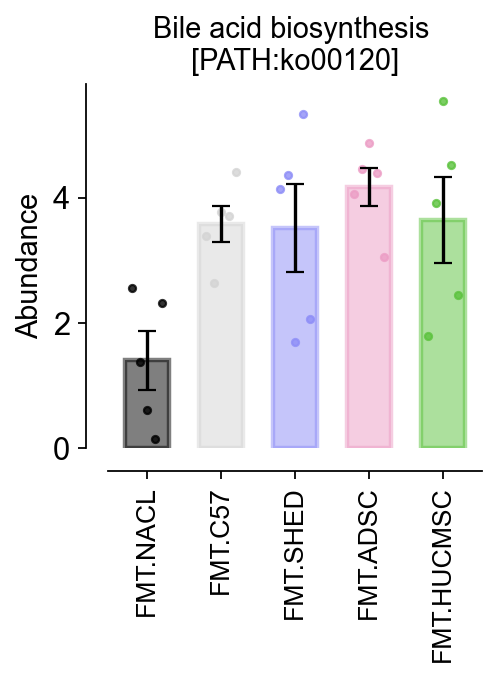

In [32]:
fig, ax = plt.subplots(figsize=(3,3))
xbar = np.arange(len(plot_data.columns.to_numpy()))
color_list_dot=['#000000','#D4D4D4','#8D8DF7','#EC9DC5','#5BC23D']
plt.bar(x=plot_data.columns, 
        height=plot_data.describe().loc['mean'], 
        yerr=plot_data.sem(), 
        width=0.6, color=color_list_dot, 
        capsize=4,zorder=1, alpha=0.5, linewidth=2,#fill=False,
        edgecolor=color_list_dot,
        error_kw={'elinewidth': None, 'capthick': None})
bw=0.4
for cols in range(len(plot_data.columns.to_numpy())):
    # get markers from here https://matplotlib.org/3.1.1/api/markers_api.html
    plt.scatter(x=np.linspace(xbar[cols]-bw/2, xbar[cols]+bw/2, int(plot_data.describe().loc['count'][cols])),
               y=plot_data[plot_data.columns[cols]].dropna(), s=10, 
                color=color_list_dot[cols], zorder=1, alpha=0.8,
               marker='o')


plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Abundance',fontsize=13)
plt.title('Bile acid biosynthesis \n[PATH:ko00120]',fontsize=13)

#plt.savefig('figures/kegg_k01442.png',dpi=300,bbox_inches='tight')
#plt.savefig('pdf/kegg_k01442.pdf',dpi=300,bbox_inches='tight')


In [33]:
taxon_contrib=pd.read_csv('qiime_result/otu/micfunpred_cr_85_contrib/KO_metagenome/KO_pathway_taxon_contrib.tsv.gz',
                          sep='\t')

In [34]:
path=taxon_contrib.loc[taxon_contrib['level']==ko_pred.loc['K01442','C'].iloc[0]]

In [35]:
path1=path.loc[path['taxon_contribution_rel']>0]
path1.head()

,taxon,level,sample,taxon_abund,level_abund,taxon_rel_abun,level_rel_abund,taxon_contribution,taxon_contribution_rel
27537,Alistipes,C 00120 Primary bile acid biosynthesis [PATH:k...,FMT.ADSC1,298.13,1117.463546,19.013878,0.040647,508.574706,45.511525
27904,Alistipes,C 00120 Primary bile acid biosynthesis [PATH:k...,FMT.ADSC2,229.44,1137.866970,16.234690,0.044560,391.397647,34.397487
28271,Alistipes,C 00120 Primary bile acid biosynthesis [PATH:k...,FMT.ADSC3,359.35,1055.290487,28.869947,0.048722,613.008824,58.089107
28638,Alistipes,C 00120 Primary bile acid biosynthesis [PATH:k...,FMT.ADSC4,291.12,921.677034,24.047580,0.043950,496.616471,53.881832
29005,Alistipes,C 00120 Primary bile acid biosynthesis [PATH:k...,FMT.ADSC5,152.80,526.042363,15.885062,0.030542,260.658824,49.550919


In [36]:
# 计算每个team的Q1季度平均值
res0 = path.groupby("taxon")["taxon_contribution_rel"].mean()
tax_name1=res0.sort_values(ascending=False).index[:20]

In [37]:
plt_data=path.copy()
plt_data=plt_data.loc[plt_data['taxon'].isin(tax_name1)]
for sample in list(set(plt_data['sample'])):
    plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel']=plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel']/plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel'].sum()

In [39]:
plt_data=path.copy()
#plt_data=plt_data.loc[plt_data['taxon'].isin(t1)]
for sample in list(set(plt_data['sample'])):
    plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel']=plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel']/plt_data.loc[plt_data['sample']==sample,'taxon_contribution_rel'].sum()
#
#sample_li=[]
for sample in list(set(plt_data['sample'])):
    test=plt_data.loc[plt_data['sample']==sample]
    plt_data.loc[sample+'others']=test.loc[~test['taxon'].isin(tax_name1)].sum()
    plt_data.loc[sample+'others','taxon']='Others'
    plt_data.loc[sample+'others','sample']=sample
    #sample_li.append(sample+'others')
    t1=tax_name1.tolist()
    t1.append('Others')

plt_data=plt_data.loc[plt_data['taxon'].isin(t1)]
#plt_data2=plt_data.loc[]

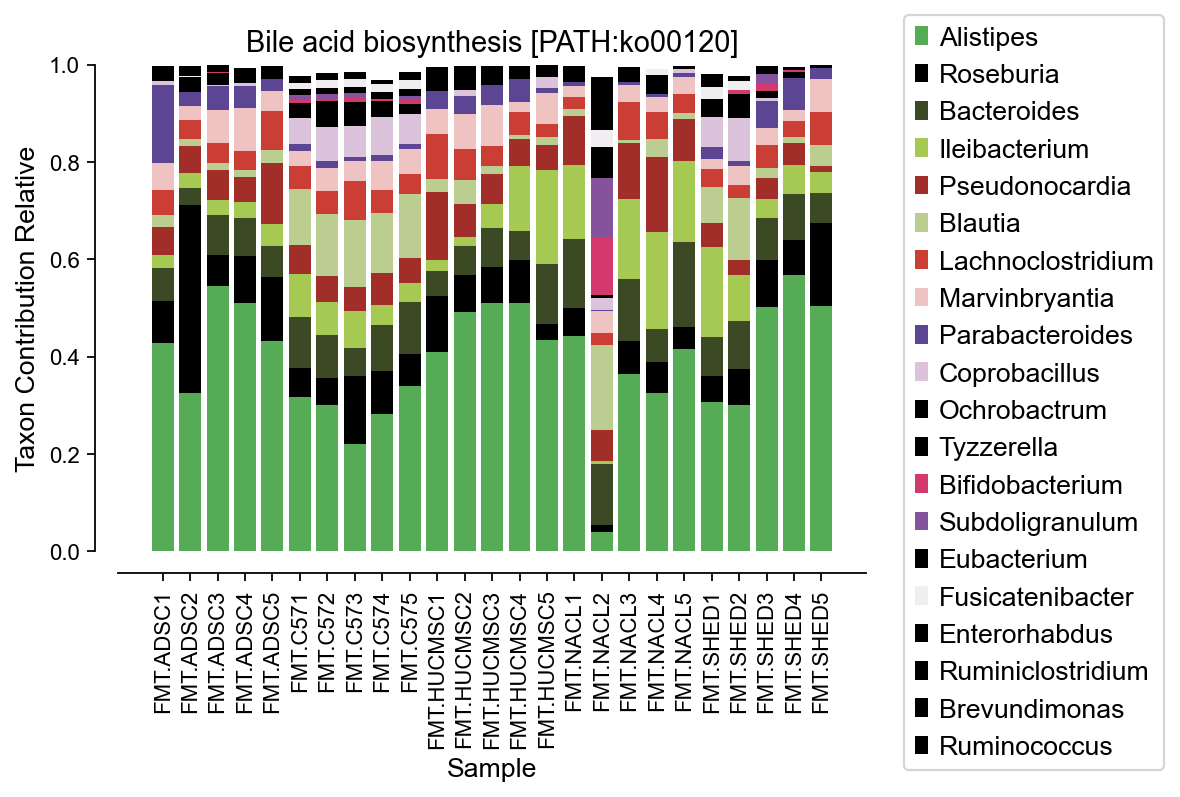

In [40]:
import matplotlib.pyplot as plt
pp=plt.figure(figsize=(6,4))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="ticks")
n=0
all_celltype=tax_name1
#all_celltype.append('Others')
palette=ov.utils.green_color+ov.utils.red_color+ov.utils.sc_color[14:]
for i in all_celltype:
    if i in all_celltype_dict.keys():
        c=all_celltype_dict[i]
    else:
        c='black'
    if n==0:
        test1=plt_data[plt_data['taxon']==i]
        ax.bar(x=test1['sample'],height=test1['taxon_contribution_rel'],width=0.8, 
               color=c,label=i)
        bottoms=test1['taxon_contribution_rel'].values
    else:
        test2=plt_data[plt_data['taxon']==i]
        ax.bar(x=test2['sample'],height=test2['taxon_contribution_rel'],bottom=bottoms,width=0.8,
               color=c,label=i)
        test1=test2
        bottoms+=test1['taxon_contribution_rel'].values
    #print(bottoms)
    n+=1
    
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))


plt.legend(bbox_to_anchor=(1.05, -0.45), loc=3, borderaxespad=0,fontsize=12)
plt.xlabel('Sample',fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.ylabel('Taxon Contribution Relative',fontsize=12)
plt.title('Bile acid biosynthesis [PATH:ko00120]',fontsize=13)
plt.grid(False)

#plt.savefig('figures/Prop_bile.png',dpi=300,bbox_inches='tight')
#plt.savefig('pdf/Prop_bile.pdf',dpi=300,bbox_inches='tight')


In [49]:
adata=adata[:,~adata.var_names.str.contains('-')]

In [50]:
dds_dict={}
for g in ['FMT.SHED','FMT.HUCMSC','FMT.ADSC','FMT.C57']:
    test_adata=adata[adata.obs['Group'].isin(['FMT.NACL',g])]
    dds=ov.bulk.pyDEG(test_adata.to_df().T)
    dds.drop_duplicates_index()
    treatment_groups=test_adata.obs[test_adata.obs['Group']==g].index.tolist()
    control_groups=test_adata.obs[test_adata.obs['Group']=='FMT.NACL'].index.tolist()
    result=dds.deg_analysis(treatment_groups,control_groups,method='ttest')
    # -1 means automatically calculates
    dds.result['qvalue']=dds.result['pvalue'].copy()
    dds.foldchange_set(fc_threshold=1.3,
                       pval_threshold=0.05,
                       logp_max=10)
    print(g,dds.result.loc['K01442'])
    dds_dict[g]=dds
    #print('... drop_duplicates_index success')

... Fold change threshold: 1.3
FMT.SHED pvalue            0.036264
qvalue            0.036264
FoldChange        2.505061
-log(pvalue)      1.440521
-log(qvalue)       1.04242
BaseMean          2.465512
log2(BaseMean)    1.301887
log2FC            1.324846
abs(log2FC)       1.324846
size              0.250506
sig                     up
Name: K01442, dtype: object
... Fold change threshold: 1.3
FMT.HUCMSC pvalue            0.026646
qvalue            0.026646
FoldChange        2.592449
-log(pvalue)      1.574368
-log(qvalue)      1.297364
BaseMean          2.526982
log2(BaseMean)    1.337415
log2FC            1.374316
abs(log2FC)       1.374316
size              0.259245
sig                     up
Name: K01442, dtype: object
... Fold change threshold: 1.3
FMT.ADSC pvalue            0.001143
qvalue            0.001143
FoldChange         2.96265
-log(pvalue)       2.94204
-log(qvalue)      2.639106
BaseMean          2.787387
log2(BaseMean)    1.478913
log2FC            1.566888
abs(log2FC) 

In [51]:
def plot_str_change(gene_name,num=5):
    genes=str(gene_name).replace("'",'').replace('[','').replace(']','').replace('','').split(',')
    res=''
    t=1
    for i in genes:
        if t%num==0:
            res+=i+'\n'
        else:
            res+=i+','
        t+=1
    return res

In [54]:
sets = {
    'FMT.C57': set(list(dds_dict['FMT.C57'].result.loc[dds_dict['FMT.C57'].result['sig']=='up'].index.tolist())),
    'FMT.SHED': set(list(dds_dict['FMT.SHED'].result.loc[dds_dict['FMT.SHED'].result['sig']=='up'].index.tolist())),
    'FMT.ADSC': set(list(dds_dict['FMT.ADSC'].result.loc[dds_dict['FMT.ADSC'].result['sig']=='up'].index.tolist())),
    'FMT.HUCMSC': set(list(dds_dict['FMT.HUCMSC'].result.loc[dds_dict['FMT.HUCMSC'].result['sig']=='up'].index.tolist())),
    
}
ret_kegg=list(sets['FMT.SHED'] & sets['FMT.HUCMSC'] & sets['FMT.ADSC'] & sets['FMT.C57'])

In [55]:
p=ko_pred.loc[ret_kegg]
ret_top_genes_neg=list(set(p.loc[p['B'].astype('str').str.contains('Lipid metabolism')]['C'].tolist()))
ret_top_genes_neg

['C 00564 Glycerophospholipid metabolism [PATH:ko00564] ',
 'C 00121 Secondary bile acid biosynthesis [PATH:ko00121] ',
 'C 00071 Fatty acid degradation [PATH:ko00071] ',
 'C 00561 Glycerolipid metabolism [PATH:ko00561] ',
 'C 00120 Primary bile acid biosynthesis [PATH:ko00120] ',
 'C 00140 Steroid hormone biosynthesis [PATH:ko00140] ',
 'C 00600 Sphingolipid metabolism [PATH:ko00600] ']

Text(0.5, 1.0, 'Up Regulated Pathway')

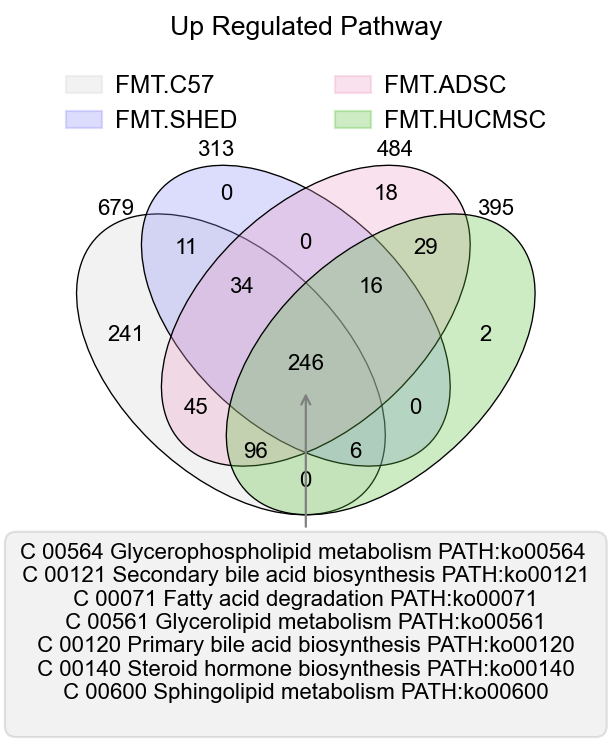

In [56]:
#from venny4py.venny4py import *
#plt.rcParams['figure.dpi'] = 80 #dpi in notebook
#dict of sets

fig, ax = plt.subplots(figsize=(4,4))   
venny4py(sets=sets,asax=ax,size=5,
         ce=['#D4D4D4','#8D8DF7','#EC9DC5','#5BC23D'])
plt.annotate(plot_str_change(ret_top_genes_neg,num=1), 
             xy= np.array([50, 30]), xytext=(0,-150),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),
             size=10)
plt.title('Up Regulated Pathway',fontsize=12)
#plt.savefig('figures/Venn_acid.png',dpi=300,bbox_inches='tight')
#plt.savefig('pdf/Venn_acid.pdf',dpi=300,bbox_inches='tight')


In [43]:
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse


#get shared elements for each combination of sets
def get_shared(sets):
    IDs = sets.keys()
    combs = sum([list(map(list, combinations(IDs, i))) for i in range(1, len(IDs) + 1)], [])

    shared = {}
    for comb in combs:
        ID = ' and '.join(comb)
        if len(comb) == 1:
            shared.update({ID: sets[comb[0]]})
        else:
            setlist = [sets[c] for c in comb]
            u = set.intersection(*setlist)
            shared.update({ID: u})
    return shared


#get unique elements for each combination of sets
def get_unique(shared):
    unique = {}
    for shar in shared:
        if shar == list(shared.keys())[-1]:
            s = shared[shar]
            unique.update({shar: s})
            continue
        count = shar.count(' and ')
        if count == 0:
            setlist = [shared[k] for k in shared.keys() if k != shar and " and " not in k]
            s = shared[shar].difference(*setlist)
        else:
            setlist = [shared[k] for k in shared.keys() if k != shar and k.count(' and ') >= count]
            s = shared[shar].difference(*setlist)
        unique.update({shar: s})
    return(unique)


#plot Venn
def venny4py(sets={}, out='./', ce='bgrc',
             asax=False, ext='png', dpi=300, size=3.5):
    shared = get_shared(sets)
    unique = get_unique(shared)
    ce = ce #colors
    lw = size*.12 #line width
    fs = size*2 #font size
    nc = 2 #legend cols
    cs = 4 #columnspacing
    
    with open(f'{out}/Intersections_{len(sets)}.txt', 'w') as f:
        for k, v in unique.items():
            f.write(f'{k}: {len(v)}, {sorted(list(v))}\n')
    
    if asax == False:
        plt.rcParams['figure.dpi'] = 80 #dpi in notebook
        plt.rcParams['savefig.dpi'] = dpi #dpi in saved figure
        fig, ax = plt.subplots(1, 1, figsize=(size, size))

    else:
        ax = asax
        
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axis('off')
    
    #4 sets
    if len(sets) == 4:
        #draw ellipses
        ew = 45 #width
        eh = 75 #height
        xe = [35, 48, 52, 65] #x coordinats
        ye = [35, 45, 45, 35] #y coordinats
        ae = [225, 225, 315, 315] #angles

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i], 
                                  angle=ae[i], alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=ae[i], ec='black', lw=lw))

        #annotate
        xt = [12, 32, 68, 88, 14, 34, 66, 86, 26, 28, 50, 50, 72, 74, 37, 60, 40, 63, 50] #x
        yt = [67, 79, 79, 67, 41, 70, 70, 41, 59, 26, 11, 60, 26, 59, 51, 17, 17, 51, 35] #y

        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)
            
    #3 sets
    if len(sets) == 3:
        #draw circles
        ew = 60 #width
        eh = 60 #height
        lw = size*.12 #line width
        xe = [37, 63, 50] #x coordinats
        ye = [55, 55, 32] #y coordinats
        nc = 3 #legend columns
        cs = 1 #columns spacing

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i], 
                                  angle=0, alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=0, ec='black', lw=lw))

        #annotate
        xt = [12, 88, 28, 22, 78, 50, 50, 30, 70, 50] #x
        yt = [80, 80,  3, 60, 60, 17, 70, 35, 35, 50] #y
        

        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)
            
    #2 sets
    if len(sets) == 2:
        #draw circles
        ew = 70 #width
        eh = 70 #height
        lw = size*.12 #line width
        xe = [37, 63] #x coordinats
        ye = [45, 45] #y coordinats

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i], 
                                  angle=0, alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=0, ec='black', lw=lw))

        #annotate
        xt = [20, 80, 18, 82, 50] #x
        yt = [80, 80, 45, 45, 45] #y

        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center', fontsize=fs, 
                    transform=ax.transData)
                
    #legend
    handles = [mpatches.Patch(color=ce[i], label=l, alpha=.3) for i, l in enumerate(sets)]
    ax.legend(labels=sets, handles=handles, fontsize=fs*1.1, frameon=False, 
              bbox_to_anchor=(.5, .99), bbox_transform=ax.transAxes, loc=9, 
              handlelength=1.5, ncol=nc, columnspacing=cs, handletextpad=.5)
    if asax == False:
        fig.savefig(f'{out}/Venn_{len(sets)}.{ext}', bbox_inches='tight', facecolor='w', )